# Mount to Google Drive

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
# Modul standar python
import os # Operasi sistem
import random # Fungsi-fungsi acak
import shutil # Operasi-operasi file dan direktori
import zipfile # Operasi-operasi file zip
import re # Operasi regular expression

# Modul untuk pengolahan gambar
import cv2 # Pengolahan gambar untuk OpenCV
from google.colab.patches import cv2_imshow # Menampilkan gambar di Colab

# Modul untuk analisis data dan visualisasi
import numpy as np # Operasi-operasi numerik
import pandas as pd # Struktur data dan analisis data
import matplotlib.pyplot as plt # Visualisasai data
import seaborn as sns # Visualisasi data yang lebih interaktif
from sklearn.metrics import classification_report, confusion_matrix # Evaluasi klasifikasi
from shutil import copyfile # Menyalin file

# Modul TensorFlow dan Keras
import tensorflow as tf # Framework machine learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Pemrosesan Gambar
from tensorflow.keras.preprocessing.image import img_to_array, load_img # Konversi gambar ke array dan memuat gambar
from tensorflow.keras.optimizers import Adam, RMSprop # Optimizer untuk model
from tensorflow.keras import layers, models # Pembuatan model
from tensorflow.keras.callbacks import EarlyStopping # Penghentian dini dalam pelatihan model

tf.keras.utils.set_random_seed(42) # Pengaturan seed untuk reproduktibilitas



# Loading Dataset

In [ ]:
dataset_dir = f"drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
validation_dir = os.path.join(dataset_dir, "val")

In [ ]:
def count_images():
  # List direktori kelas pada setiap dataset
  train_classes_dirs = os.listdir(train_dir)
  for folder in train_classes_dirs:
    # Mendapatkan jumlah gambar pada setiap dataset:
    train_classes = os.listdir(os.path.join(train_dir, folder))
    validation_classes = os.listdir(os.path.join(validation_dir, folder))
    test_classes = os.listdir(os.path.join(test_dir, folder))

    # Menampilkan informasi jumlah gambar untuk setiap kelas
    print(f"Class: {folder}")
    print(f"\tTrain: {len(train_classes)} images")
    print(f"\tValidation: {len(validation_classes)} images")
    print(f"\tTest: {len(test_classes)} images")
    total_images = len(train_classes) + len(validation_classes) + len(test_classes)
    print(f"\tTotal: {total_images} images")
    print()

count_images()

Class: 1
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: A
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: B
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: C
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: D
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: E
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: F
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: G
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: H
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: I
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: J
	Train: 100 images
	Validation: 20 images
	Test: 10 images
	Total: 130 images

Class: K
	Train: 100 images
	Val

# Preprocessing and Modelling

In [ ]:
class Model:
  def __init__(self, model, config):
    self.config = config
    self.batch_size = self.config['batch_size']
    # self.trainable = self.config['trainable']
    self.epochs = self.config['epochs']
    self.classes= self.config['classes']
    self.input_shape = self.config['input_shape']
    self.base_model = model

  def preprocess_image(self,img):
    # img = cv2.resize(img, (224,224))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # find the green color
    mask_green = cv2.inRange(hsv, (36,0,0), (86,255,255))
    # find the brown color
    mask_brown = cv2.inRange(hsv, (8, 60, 20), (30, 255, 200))
    # find the yellow color in the leaf
    mask_yellow = cv2.inRange(hsv, (21, 39, 64), (40, 255, 255))

    # find any of the three colors(green or brown or yellow) in the image
    mask = cv2.bitwise_or(mask_green, mask_brown)
    mask = cv2.bitwise_or(mask, mask_yellow)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)

    return res

  def create_data_generators(self, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, preprocess_input=None):
    train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range = 25,
      zoom_range = [0.5, 1.1],
      width_shift_range=0.15,
      shear_range= 0.15,
      height_shift_range=0.15,
      horizontal_flip=True,
      vertical_flip= True,
      fill_mode='nearest',)

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32,
                                                        seed=42,
                                                        class_mode='sparse',
                                                        target_size=(224, 224))

    validation_datagen = ImageDataGenerator(rescale = 1/255,)

    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  seed=42,
                                                                  class_mode='sparse',
                                                                  target_size=(224, 224))
    test_datagen = ImageDataGenerator(rescale= 1./255.)

    test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                                  batch_size=32,
                                                                  shuffle=False,
                                                                  seed=42,
                                                                  class_mode='sparse',
                                                                  target_size=(224, 224))

    self.train_generator = train_generator
    self.validation_generator = validation_generator
    self.test_generator = test_generator
    return train_generator, validation_generator, test_generator

  def set_generators(self, train_generator, validation_generator, test_generator, ):
    self.train_generator = train_generator
    self.validation_generator = validation_generator
    self.test_generator = test_generator


  def build(self, compile_config, custom_layer = None):

    compile_config['metrics'] = [metric.replace("accuracy", "acc") for metric in compile_config['metrics']]

    layers = []

    # Append base model to layers_list
    layers.append(self.base_model)

    flatten_layer = tf.keras.layers.Flatten()
    layers.append(flatten_layer)

    if custom_layer is None:
      layers.append(tf.keras.layers.Dense(512, activation='relu'))
    else:
      for layer in custom_layer:
        layers.append(layer)

    prediction_layer = tf.keras.layers.Dense(self.classes, activation='softmax')
    layers.append(prediction_layer)

    self.model = tf.keras.models.Sequential(layers)

    self.model.compile(**compile_config)
    self.model.summary()

    return self.model

  def train_model(self, model_name, reduce_lr_config=None):
    self.model_name = model_name
    model_filepath = model_name +'-saved-model-{epoch:02d}-acc-{val_acc:.2f}.hdf5'
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    callbacks = [model_checkpoint, model_early_stopping]
    if reduce_lr_config is not None:
      reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(**reduce_lr_config)
      callbacks.append(reduce_lr)
    model_history = self.model.fit(self.train_generator, epochs = self.epochs,
                                   validation_data = self.validation_generator,callbacks=callbacks , verbose=1)
    self.history = model_history
    return model_history

  def plot_training_history(self):
    acc = self.history.history['acc']
    val_acc = self.history.history['val_acc']
    loss = self.history.history['loss']
    val_loss = self.history.history['val_loss']

    epochs = range(len(acc))

    plt.subplot()
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.subplot()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss,  label='Validation Loss')
    plt.legend()
    plt.show()

    plt.show()

  def evaluate(self):
    evaluate = self.model.evaluate(self.test_generator)
    print('Loss of the model is - ', evaluate[0])
    print('Accuracy of the model is - ', evaluate[1]*100, '%')

    classes =  list(self.test_generator.class_indices.keys())
    Y_pred = self.model.predict(self.test_generator)
    y_pred = np.argmax(Y_pred, axis=1)

    print(classification_report(self.test_generator.classes, y_pred, target_names=classes))
    print('Confusion Matrix')
    conf_matrix = confusion_matrix(self.test_generator.classes, y_pred)
    df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)
    ax = sns.heatmap(df_cm, annot=True, cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

  def find_best_weights(self, weights_dir):
    weights = os.listdir(weights_dir)
    weights = list(filter(lambda x: self.model_name in x, weights))

    best_acc = 0
    best_weight = None
    for weight in weights:
      acc = int(re.search(r"\.(\d+)\.", weight).group(1))
      if best_acc < acc:
        best_acc = acc
        best_weight = weight

    self.best_weight = os.path.join(weights_dir, best_weight)
    print(self.best_weight)

  def evaluate_best_weights(self):
    if self.best_weight is None:
      print("find_best_model")
      return 1
    self.model.load_weights(self.best_weight)
    self.evaluate()

  def save_best_model(self, target_dir):
    if self.best_weight is None:
      print("find_best_model")
      return 1
    print(f"Copy {self.best_weight} to {target_dir}")
    shutil.copy(self.best_weight, target_dir)

  def load_weights(self, weight_path):
    self.best_weight = weight_path
    self.model.load_weights(self.best_weight)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as iv3_preprocess_input

# Configuration settings
config = {
    "batch_size": 32,
    "epochs": 50,
    "classes": 87,
    "input_shape": (224, 224, 3)
}

# Model compilation configuration
compile_config = {
    "loss": "sparse_categorical_crossentropy",
    "optimizer": Adam(learning_rate=0.0001),
    "metrics": ["accuracy"],
}

# Load InceptionV3 model with pre-trained weights
inceptionv3 = InceptionV3(weights="imagenet", include_top=False, input_shape=config['input_shape'])

# Freeze layers except for the last ones for fine-tuning
for layer in inceptionv3.layers[:249]:
    layer.trainable = False
for layer in inceptionv3.layers[249:]:
    layer.trainable = True

# Additional custom layers to be added on top of InceptionV3
custom_layers = [
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu')
]

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
iv3_model = Model(model=inceptionv3, config=config)
iv3_model.create_data_generators(train_dir, validation_dir, test_dir, preprocess_input=iv3_preprocess_input)

Found 8700 images belonging to 87 classes.
Found 1740 images belonging to 87 classes.
Found 870 images belonging to 87 classes.


(<keras.src.preprocessing.image.DirectoryIterator at 0x7d5845749810>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7d583033f040>)

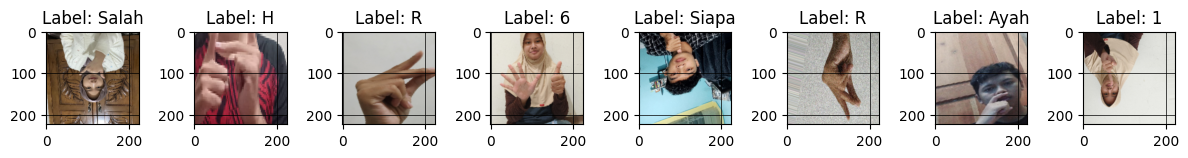

In [ ]:
def plot_images_with_labels(generator, num_images=5, image_size=(64, 64)):
    # Mengambil batch gambar dari generator
    images, labels = next(generator)

    # Mendapatkan kamus dari generator yang mengaitkan nilai numerik ke nilai string
    label_mapping = generator.class_indices

    # Menampilkan gambar-gambar beserta labelnya dengan grid
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.grid(True, color='black', linestyle='-', linewidth=0.5)  # Menambahkan grid

        # Mengonversi label numerik menjadi label string menggunakan kamus dari generator
        label_numeric = labels[i]
        label_string = list(label_mapping.keys())[list(label_mapping.values()).index(label_numeric)]

        plt.title(f"Label: {label_string}")  # Menampilkan label string
    plt.subplots_adjust(wspace=0.5)  # Menambahkan ruang antar subplot
    plt.tight_layout()  # Memastikan layout subplot teratur
    plt.show()

# Contoh penggunaan fungsi plot_images_with_labels dengan generator yang Anda miliki
plot_images_with_labels(iv3_model.train_generator, num_images=8, image_size=(100, 100))

# Training

In [ ]:
from keras.utils import plot_model

iv3_model.build(compile_config, custom_layer=custom_layers)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 87)                8

In [ ]:
reduce_lr_config = {
    'monitor': 'val_loss',
    'factor': 0.05,
    'patience':5,
    'min_lr': 0.000002
}
iv3_model.train_model('inceptionv3', reduce_lr_config=reduce_lr_config)

Epoch 1/50
272/272 [==============================] - ETA: 0s - loss: 3.5200 - acc: 0.1454 
Epoch 1: val_acc improved from -inf to 0.25575, saving model to inceptionv3-saved-model-01-acc-0.26.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


272/272 [==============================] - 6657s 24s/step - loss: 3.5200 - acc: 0.1454 - val_loss: 2.8615 - val_acc: 0.2557 - lr: 1.0000e-04
Epoch 2/50
272/272 [==============================] - ETA: 0s - loss: 1.9312 - acc: 0.4505
Epoch 2: val_acc improved from 0.25575 to 0.43506, saving model to inceptionv3-saved-model-02-acc-0.44.hdf5
272/272 [==============================] - 473s 2s/step - loss: 1.9312 - acc: 0.4505 - val_loss: 2.6178 - val_acc: 0.4351 - lr: 1.0000e-04
Epoch 3/50
272/272 [==============================] - ETA: 0s - loss: 1.2474 - acc: 0.6268
Epoch 3: val_acc improved from 0.43506 to 0.52931, saving model to inceptionv3-saved-model-03-acc-0.53.hdf5
272/272 [==============================] - 499s 2s/step - loss: 1.2474 - acc: 0.6268 - val_loss: 2.2736 - val_acc: 0.5293 - lr: 1.0000e-04
Epoch 4/50
272/272 [==============================] - ETA: 0s - loss: 0.9530 - acc: 0.7099
Epoch 4: val_acc improved from 0.52931 to 0.59828, saving model to inceptionv3-saved-model-0

# Evaluation

In [ ]:
iv3_model.plot_training_history

NameError: ignored

In [ ]:
iv3_model.plot_history()

28/28 [==============================] - 326s 12s/step - loss: 0.0691 - acc: 0.9759
Loss of the model is -  0.06910622864961624
Accuracy of the model is -  97.58620858192444 %
28/28 [==============================] - 29s 966ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
           A       0.91      1.00      0.95        10
         Ada       0.91      1.00      0.95        10
         Aku       1.00      1.00      1.00        10
         Ap

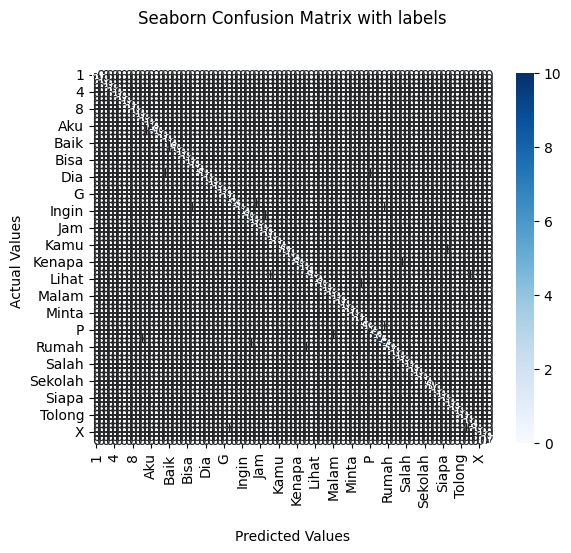

In [ ]:
iv3_model.evaluate()

./inceptionv3-saved-model-16-acc-0.73.hdf5
28/28 [==============================] - 30s 1s/step - loss: 0.0880 - acc: 0.9621
Loss of the model is -  0.08804281800985336
Accuracy of the model is -  96.20689749717712 %
28/28 [==============================] - 27s 987ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       0.91      1.00      0.95        10
           9       1.00      0.90      0.95        10
           A       0.91      1.00      0.95        10
         Ada       0.91      1.00      0.95        10
         Aku       1.00 

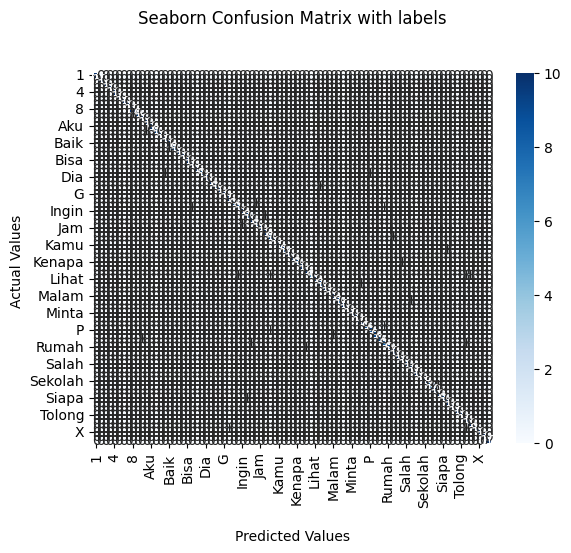

In [ ]:
iv3_model.model_name = 'inceptionv3'
iv3_model.find_best_weights('.')
iv3_model.evaluate_best_weights()

# Save Model

In [ ]:
target_dir = '/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Modelling'
iv3_model.save_best_model(target_dir = target_dir)

Copy ./inceptionv3-saved-model-16-acc-0.73.hdf5 to /content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Modelling


In [ ]:
iv3_model.model.load_weights("/content/inceptionv3-saved-model-16-acc-0.73.hdf5")

# Testing Accuration

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input as iv3_preprocess_input
import numpy as np

# Load an image for testing
img_path = '/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Dataset_baru/test/Baik/Copy of baik_183.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # Resize to (224, 224)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array = iv3_preprocess_input(img_array)

# Make a prediction using your trained model
predictions = iv3_model.model.predict(img_array)

# Retrieve class labels from the data generator
class_labels = iv3_model.train_generator.class_indices

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Check if the predicted_class_index is within the valid range
if predicted_class_index < len(class_labels):
  predicted_class_label = [key for key, value in class_labels.items() if value == predicted_class_index][0]
  print(f"Predicted class : {predicted_class_label}")
else:
  print("Error: Predicted class index out of range.")

1/1 [==============================] - 0s 43ms/step
Predicted class : Baik


# Convert to TFLite

In [ ]:
iv3_model = tf.keras.models.load_model("/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Modelling/inceptionv3-saved-model-16-acc-0.73.hdf5")

converter = tf.lite.TFLiteConverter.from_keras_model(iv3_model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("/content/drive/Shareddrives/PRODUCT CAPSTONE_CH2-PS093/Modelling/tflite_modelling.tflite", "wb").write(tflite_model)

198653052

In [ ]:
# Saving the model into H5 system file
save_model = "model.h5"
model.save(save_model)
print("Model save into ", save_model)